In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold1/7383-3-0-0.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

drive  sample_data


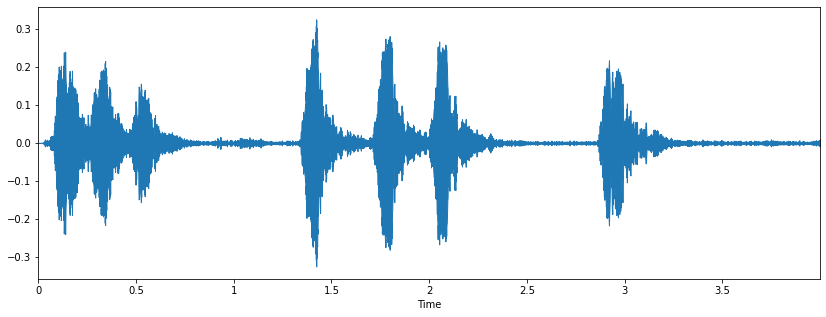

In [ ]:
# Class: Dog bark
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

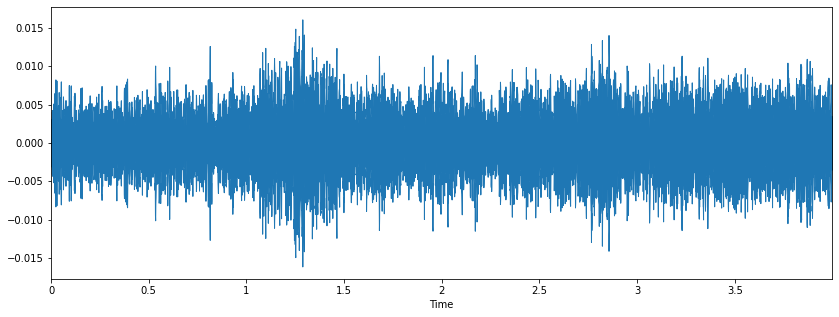

In [ ]:
# Class: Children playing 
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold5/100263-2-0-121.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

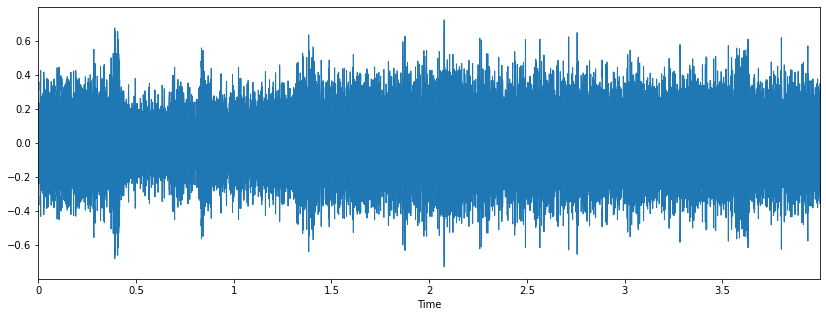

In [ ]:
# Class: Drilling
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold3/103199-4-0-3.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

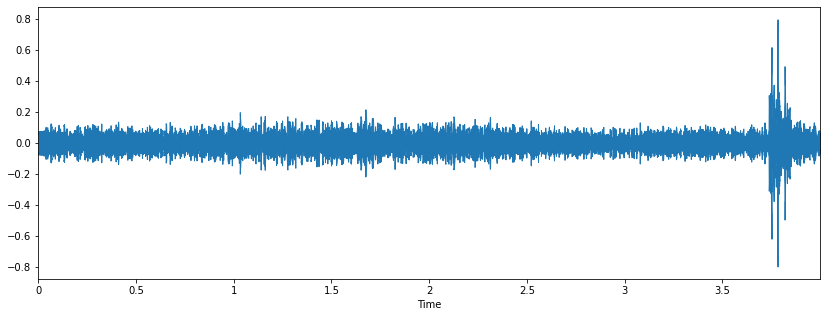

In [ ]:
# Class: Siren
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold7/102853-8-0-1.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

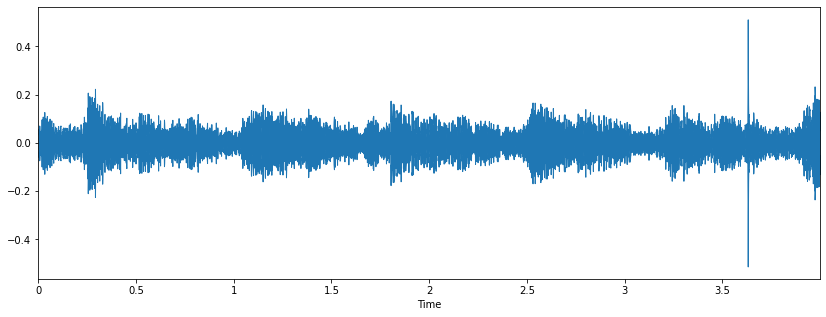

In [ ]:
# Class: Street music
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold7/101848-9-0-8.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

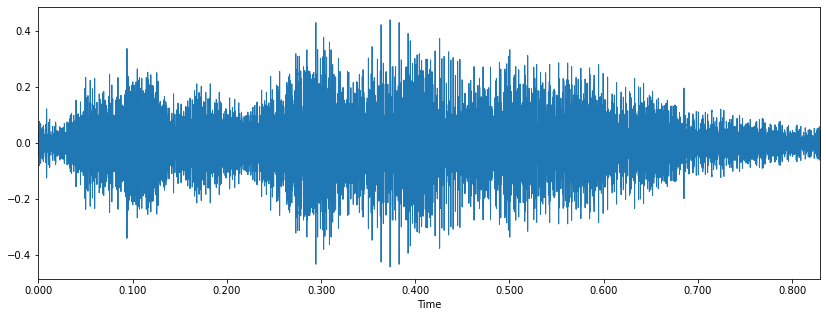

In [ ]:
# Class: Car horn
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold8/107090-1-1-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)


In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

44100

In [ ]:
wave_audio

array([[ -378,    31],
       [ -762,   -82],
       [-1063,  -290],
       ...,
       [  -34,   247],
       [  180,   291],
       [  420,   403]], dtype=int16)

In [ ]:
data

array([-0.00512102, -0.02090292, -0.03347859, ..., -0.00788531,
        0.004038  ,  0.        ], dtype=float32)

In [ ]:
import pandas as pd
metadata=pd.read_csv('/content/drive/MyDrive/ml data/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

In [ ]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## **Data Preprocessing**


In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold8/107090-1-1-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[-0.00512102 -0.02090292 -0.03347859 ... -0.00788531  0.004038
  0.        ]


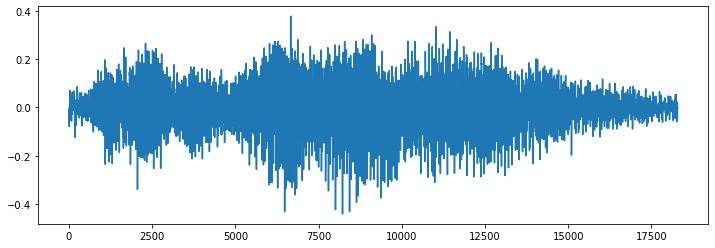

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
wave_audio

array([[ -378,    31],
       [ -762,   -82],
       [-1063,  -290],
       ...,
       [  -34,   247],
       [  180,   291],
       [  420,   403]], dtype=int16)

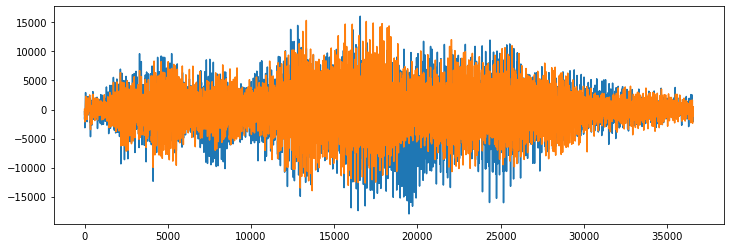

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

**Extract Features**

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 36)


In [ ]:
mfccs

array([[-230.1097   , -221.40276  , -203.37729  , ..., -260.55692  ,
        -264.64102  , -265.6607   ],
       [ 166.20587  ,  162.42055  ,  153.5889   , ...,  162.3627   ,
         164.42819  ,  160.22832  ],
       [ -33.441277 ,  -50.028175 ,  -71.10745  , ...,  -40.982864 ,
         -38.6802   ,  -36.095123 ],
       ...,
       [  -5.005383 ,   -7.8593407,  -13.322529 , ...,   -6.0698833,
          -4.4349623,   -2.741621 ],
       [   9.310654 ,    8.140507 ,    6.724911 , ...,   10.378196 ,
           7.7335453,    8.826983 ],
       [  11.633441 ,   13.68639  ,   15.941612 , ...,   16.555025 ,
          15.80286  ,   16.000046 ]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/ml data/UrbanSound8K/audio/'
metadata=pd.read_csv('/content/drive/MyDrive/ml data/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [ ]:
# import numpy as np
# from tqdm import tqdm
# ### Now we iterate through every audio file and extract features 
# ### using Mel-Frequency Cepstral Coefficients
# extracted_features=[]
# for index_num,row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#     final_class_labels=row["class"]
#     data=features_extractor(file_name)
#     extracted_features.append([data,final_class_labels])

In [ ]:
# extracted_features = np.array(extracted_features,dtype=object)
# np.save('/content/drive/MyDrive/ml data/features_checkpoint.npy',extracted_features)

In [ ]:
import numpy as np
extracted_features = np.load('/content/drive/MyDrive/ml data/features_checkpoint.npy',allow_pickle=True)

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [-214.95764, 70.502464, -130.70279, -53.116936...          dog_bark
1  [-423.7311, 109.2299, -52.872597, 60.827538, 0...  children_playing
2  [-458.52844, 121.35432, -46.53568, 51.969467, ...  children_playing
3  [-413.6325, 101.61351, -35.43868, 53.047146, 1...  children_playing
4  [-446.38693, 113.68634, -52.4572, 60.349728, 2...  children_playing

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.3082390e+02,  1.1256226e+02, -2.2600880e+01, ...,
         3.2528090e+00, -1.3692100e+00,  2.7386467e+00],
       [-1.3446434e+01,  9.1048195e+01, -7.8661480e+00, ...,
        -3.2665925e+00, -5.2884049e+00, -1.5532948e+00],
       [-4.9575279e+01,  2.3543632e-01, -2.0504959e+01, ...,
         2.8775632e+00, -1.5828820e+00,  3.5109406e+00],
       ...,
       [-4.2677444e+02,  9.2583252e+01,  3.3174918e+00, ...,
         7.9330587e-01,  7.1890563e-01,  7.1397936e-01],
       [-1.4541724e+02,  1.3619023e+02, -3.3450352e+01, ...,
         1.4591717e+00, -1.9928970e+00, -8.9318514e-01],
       [-4.2099823e+02,  2.1074756e+02,  3.5814040e+00, ...,
        -5.4054909e+00, -3.3959777e+00, -1.5590975e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape



(1747, 40)

In [ ]:
y_train.shape



(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

**Model Training and Evaluation**


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y_train.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [ ]:
# Display model architecture summary 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [ ]:
# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Pre-training accuracy: 10.5323%


In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
202/219 [==========================>...] - ETA: 0s - loss: 9.8049 - accuracy: 0.1776 
Epoch 1: val_loss improved from inf to 2.17067, saving model to saved_models/weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 9.2621 - accuracy: 0.1807 - val_loss: 2.1707 - val_accuracy: 0.2129
Epoch 2/100
201/219 [==========================>...] - ETA: 0s - loss: 2.2641 - accuracy: 0.2211
Epoch 2: val_loss improved from 2.17067 to 2.07946, saving model to saved_models/weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.2584 - accuracy: 0.2203 - val_loss: 2.0795 - val_accuracy: 0.2427
Epoch 3/100
207/219 [===========================>..] - ETA: 0s - loss: 2.0939 - accuracy: 0.2518
Epoch 3: val_loss improved from 2.07946 to 1.94727, saving model to saved_models/weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.0951 - accuracy: 0.2525 - val_loss: 1.9473 - val_accuracy:

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9328561425209045
Testing Accuracy:  0.8843731880187988


In [ ]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None

    return np.array([mfccsscaled])

In [ ]:
def print_prediction(filename):
  features = extract_feature(filename)
  prediction = model.predict(features)
  ind = np.argmax(prediction)
  pred = labelencoder.classes_[ind]
  print(f'Predicted Class is {pred} with probability {prediction[0][ind]}')

In [ ]:
# Class: children playing

filename = '/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold5/100263-2-0-121.wav' 
print_prediction(filename)

1/1 [==============================] - 0s 94ms/step
Predicted Class is children_playing with probability 0.9927417039871216


In [ ]:
# Class: dog bark

filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold1/7383-3-0-0.wav'
print_prediction(filename)

1/1 [==============================] - 0s 20ms/step
Predicted Class is dog_bark with probability 0.9999862909317017


In [ ]:
# Class: Drilling

filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold3/103199-4-0-3.wav'
print_prediction(filename)

1/1 [==============================] - 0s 18ms/step
Predicted Class is drilling with probability 0.9999256134033203


In [ ]:
# Class: Siren
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold7/102853-8-0-1.wav'
print_prediction(filename)

1/1 [==============================] - 0s 19ms/step
Predicted Class is siren with probability 0.9997643828392029


In [ ]:
# Class: Street music
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold7/101848-9-0-8.wav'
print_prediction(filename)

1/1 [==============================] - 0s 17ms/step
Predicted Class is street_music with probability 0.4108622372150421


In [ ]:
# Class: Car horn
filename='/content/drive/MyDrive/ml data/UrbanSound8K/audio/fold8/107090-1-1-0.wav'
print_prediction(filename)

1/1 [==============================] - 0s 21ms/step
Predicted Class is car_horn with probability 1.0
